# Biodiversity in National Parks

## Introduction

This project aims to study protected animals and plants in US National Parks in order to better understand their distribution and aid in conserving them. The data is from the National Park Service and is provided by Codecademy.

## The data

Let's begin by importing the necessary libraries and creating the dataframes from the provided CSV files.

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

Before we begin, let's take a look at our files to get an idea of what data they have.

In [29]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [30]:
observations.head()

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83


In [31]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [11]:
species_info.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

There are 7 categories of species and 4 different conservation statuses. We notice that only 191 species have a conservation_status that is not null; that means the rest are not protected. Let's take a look at the unique values for the `category` and `conservation_status` columns.

In [10]:
danger_levels = species_info.conservation_status.dropna().unique()
danger_levels

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

In [32]:
observations[['scientific_name', 'park_name']].describe()

,scientific_name,park_name
count,22164,22164
unique,5541,4
top,Abies bifolia,Bryce National Park
freq,4,5541


We observe that the species_info dataframe has some duplicates. The number of unique species is the same in both dataframes.

In [33]:
observations.describe()

,observations
count,22164.000000
mean,149.450866
std,81.206840
min,9.000000
25%,88.000000
50%,129.000000
75%,217.000000
max,805.000000


Let's make sure all of our data is in the right form and ready to process.

In [8]:
species_info.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [9]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

## Data Analysis and Visualizations

We only have 191 entries in the conservation_status column. It appears that the conservation_status entry for species that are under no threat is blank. Let's create a chart to find out what the distribution of the conservation status is for the observed protected species.

In [35]:
mammals = [len(species_info[(species_info['category'] =='Mammal') & (species_info['conservation_status'] == i)]) for i in danger_levels]
birds = [len(species_info[(species_info['category'] =='Bird') & (species_info['conservation_status'] == i)]) for i in danger_levels]
reptiles = [len(species_info[(species_info['category'] =='Reptile') & (species_info['conservation_status'] == i)]) for i in danger_levels]
amphibians = [len(species_info[(species_info['category'] =='Amphibian') & (species_info['conservation_status'] == i)]) for i in danger_levels]
fish = [len(species_info[(species_info['category'] =='Fish') & (species_info['conservation_status'] == i)]) for i in danger_levels]
vascular_plants = [len(species_info[(species_info['category'] =='Vascular Plant') & (species_info['conservation_status'] == i)]) for i in danger_levels]
nonvascular_plants = [len(species_info[(species_info['category'] =='Nonvascular Plant') & (species_info['conservation_status'] == i)]) for i in danger_levels]

In [36]:
rept_bottom = np.add(mammals, birds)
amph_bottom = np.add(rept_bottom, reptiles)
fish_bottom = np.add(amph_bottom, amphibians)
vasc_bottom = np.add(fish_bottom, fish)
nonvasc_bottom = np.add(vasc_bottom, vascular_plants)

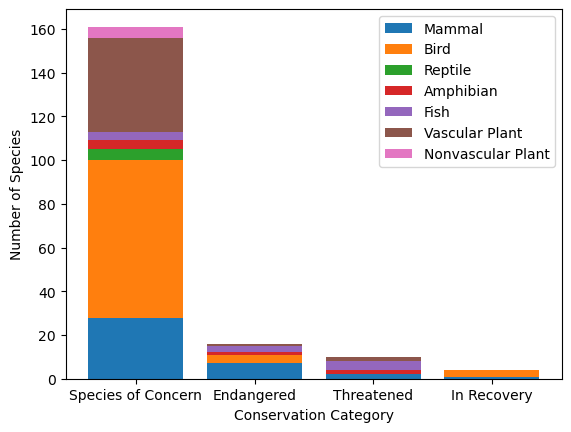

<Figure size 640x480 with 0 Axes>

In [14]:
ax1 = plt.subplot()
ax1.bar(range(4), mammals)
ax1.bar(range(4), birds, bottom = mammals)
ax1.bar(range(4), reptiles, bottom = rept_bottom)
ax1.bar(range(4), amphibians, bottom = amph_bottom)
ax1.bar(range(4), fish, bottom = fish_bottom)
ax1.bar(range(4), vascular_plants, bottom = vasc_bottom)
ax1.bar(range(4), nonvascular_plants, bottom = nonvasc_bottom)
ax1.legend(species_info.category.unique())
ax1.set_xticks(range(4))
ax1.set_xticklabels(danger_levels)
ax1.set_xlabel('Conservation Category')
ax1.set_ylabel('Number of Species')
plt.show()
plt.clf()

It seems that most protected species have a `Species of Concern` conservation status. Birds have the highest number of protected species, followed by vascular plants and mammals. However, that doesn't tell the whole story. Perhaps some categories have a high **proportion** of protected species but not a big **number**. Let's create a table to find out the percentage of protected species for each category.

In [37]:
species_info_grouped = species_info.groupby('category')

In [38]:
df=species_info_grouped['category'].value_counts().reset_index()

In [39]:
df['Protected Species']=  [sum(cat) for cat in [amphibians, birds, fish, mammals, nonvascular_plants, reptiles, vascular_plants]]
df['Protected Percentage'] = df['Protected Species']/df['count']

In [40]:
df.columns = ['Category', 'Total Species', 'Protected Species', 'Protected Percentage']

In [19]:
df

,Category,Total Species,Protected Species,Protected Percentage
0,Amphibian,80,7,0.087500
1,Bird,521,79,0.151631
2,Fish,127,11,0.086614
3,Mammal,214,38,0.177570
4,Nonvascular Plant,333,5,0.015015
5,Reptile,79,5,0.063291
6,Vascular Plant,4470,46,0.010291


Let's take a look at our observations file. It would be interesting to know what species are the most prevalent in each park.

In [41]:
observations = observations.drop_duplicates()

In [42]:
observations.head()

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83


We have already seen that there are only 4 national parks in our file. However, there are thousands of unique species, making it difficult to visualize all of them. We can keep it simple by making a graph with the 10 species with the most appearances for each park.

Let's group the dataframe by species and national park and find the total number of observations for each species in each park.

In [47]:
observations = observations.groupby(['scientific_name', 'park_name'], dropna=False)['observations'].sum().reset_index()

In [23]:
parks = observations.park_name.unique()

In [24]:
bryce = observations[['scientific_name', 'observations']][observations.park_name == 'Bryce National Park'].reset_index(drop=True)
bryce = bryce.merge(species_info, how='left', on='scientific_name')
great_smoky = observations[['scientific_name', 'observations']][observations.park_name == 'Great Smoky Mountains National Park'].reset_index(drop=True)
great_smoky = great_smoky.merge(species_info, how='left', on='scientific_name')
yellowstone = observations[['scientific_name', 'observations']][observations.park_name == 'Yellowstone National Park'].reset_index(drop=True)
yellowstone = yellowstone.merge(species_info, how='left', on='scientific_name')
yosemite = observations[['scientific_name', 'observations']][observations.park_name == 'Yosemite National Park'].reset_index(drop=True)
yosemite = yosemite.merge(species_info, how='left', on='scientific_name')

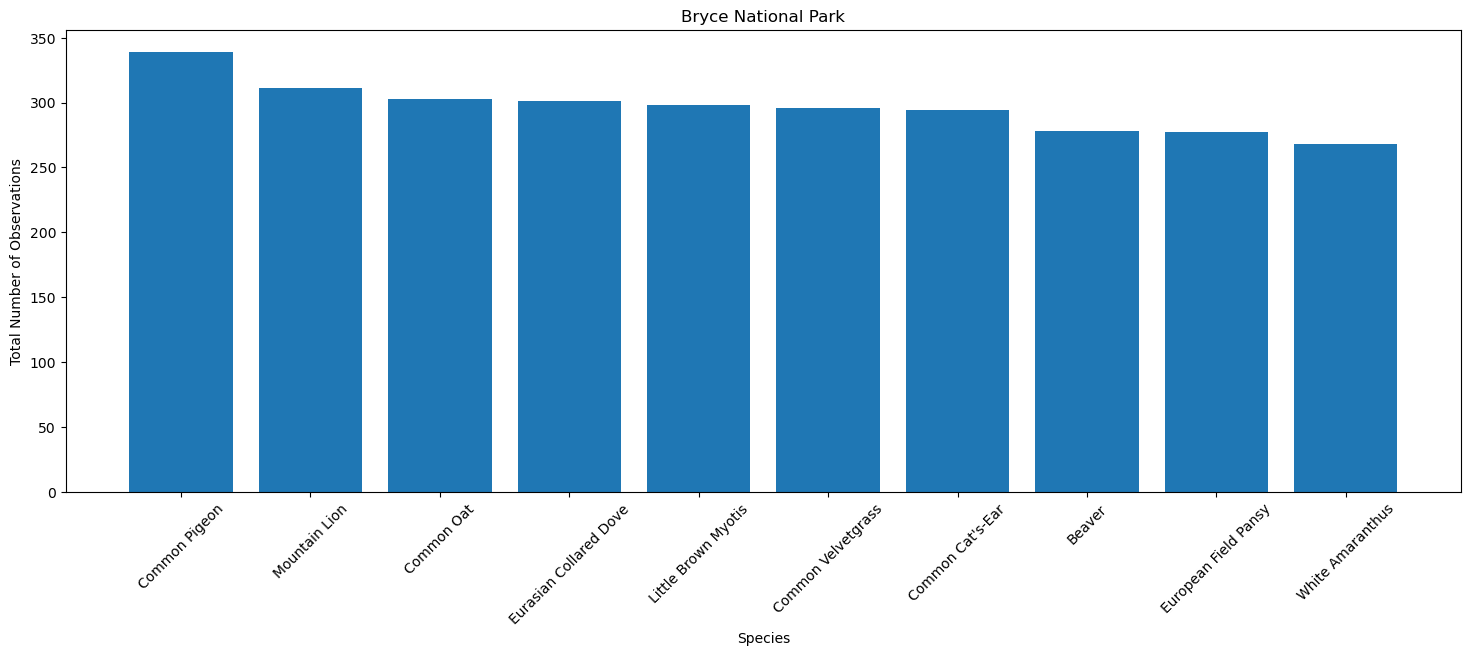

<Figure size 640x480 with 0 Axes>

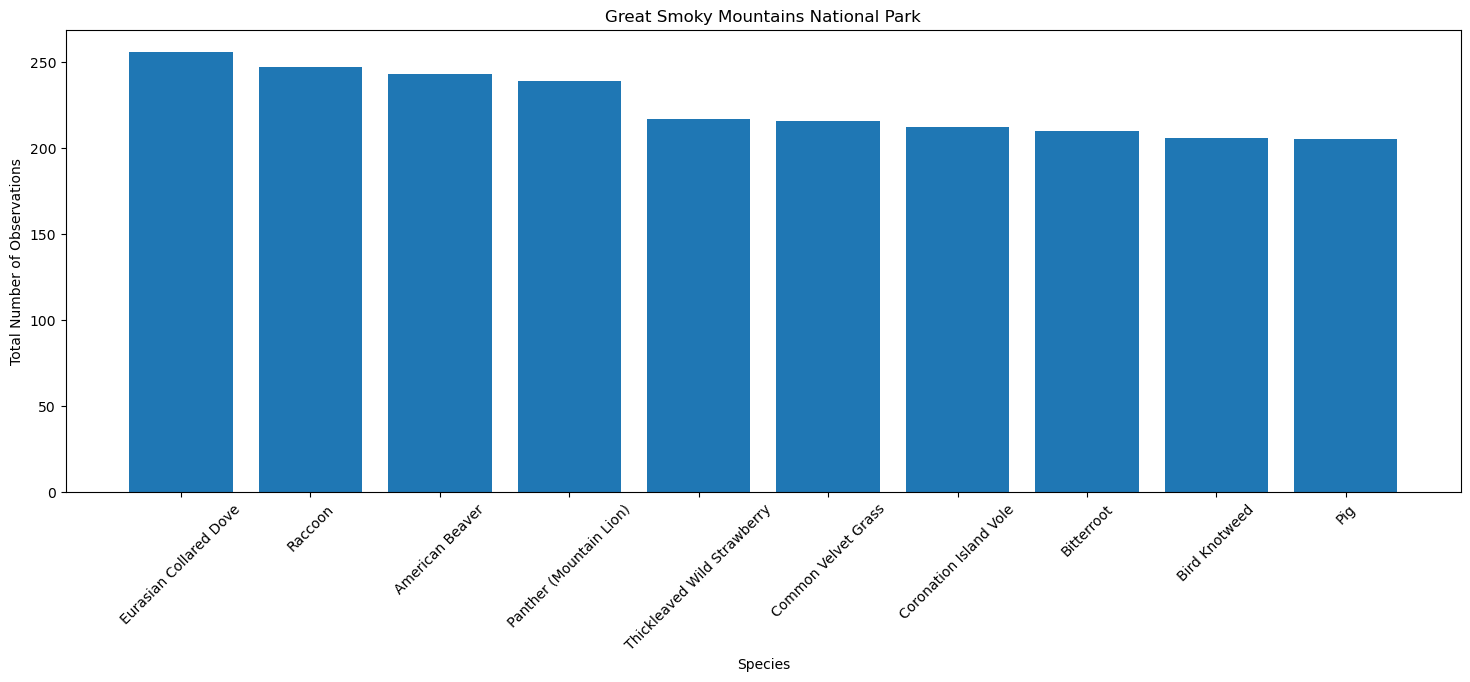

<Figure size 640x480 with 0 Axes>

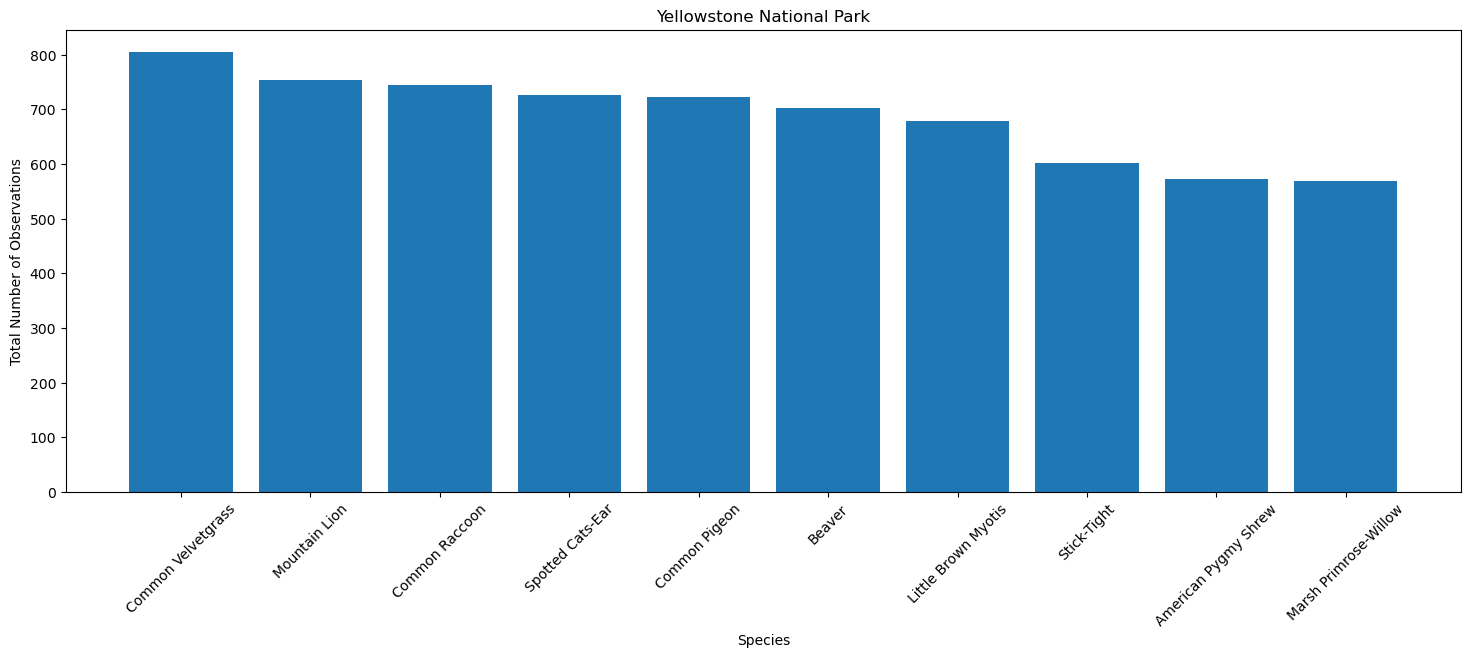

<Figure size 640x480 with 0 Axes>

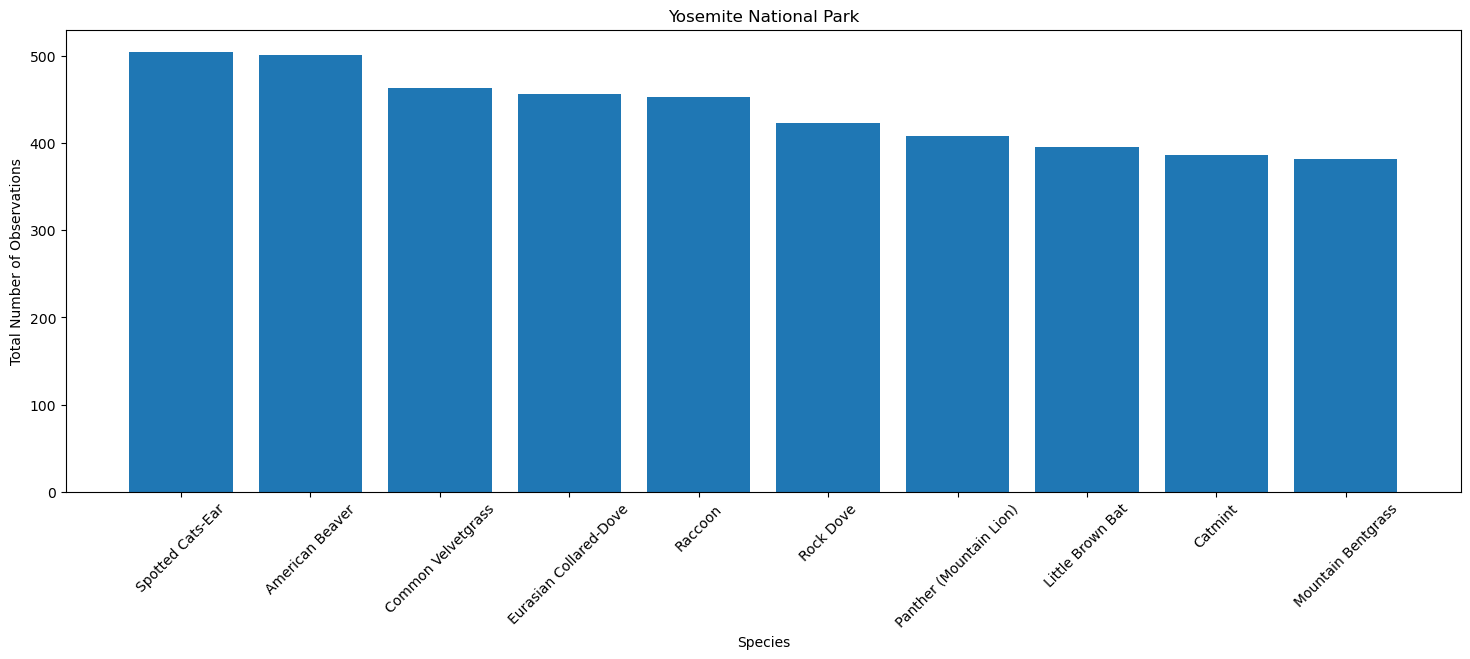

<Figure size 640x480 with 0 Axes>

In [43]:
def scientific_to_common(name):
    for i in range(len(species_info)):
        if species_info.scientific_name[i] == name:
            name = species_info.common_names[i]
            break
    return name
i=0
for park in [bryce, great_smoky, yellowstone, yosemite]:
    park = park.sort_values(by='observations', ascending=False)
    park.common_names = park.common_names.str.split(',').str[0]
    figure = plt.figure(figsize = (18, 6))
    plt.bar('common_names', height='observations', data=park.drop_duplicates(subset='scientific_name').head(10))
    plt.xticks(rotation=45)
    plt.xlabel('Species')
    plt.ylabel('Total Number of Observations')
    plt.title(parks[i])
    i+=1
    plt.show()
    plt.clf()

It would also be useful to know how many species with conservation status of "Endangered" appear in each park, since they arguably need the most protection.

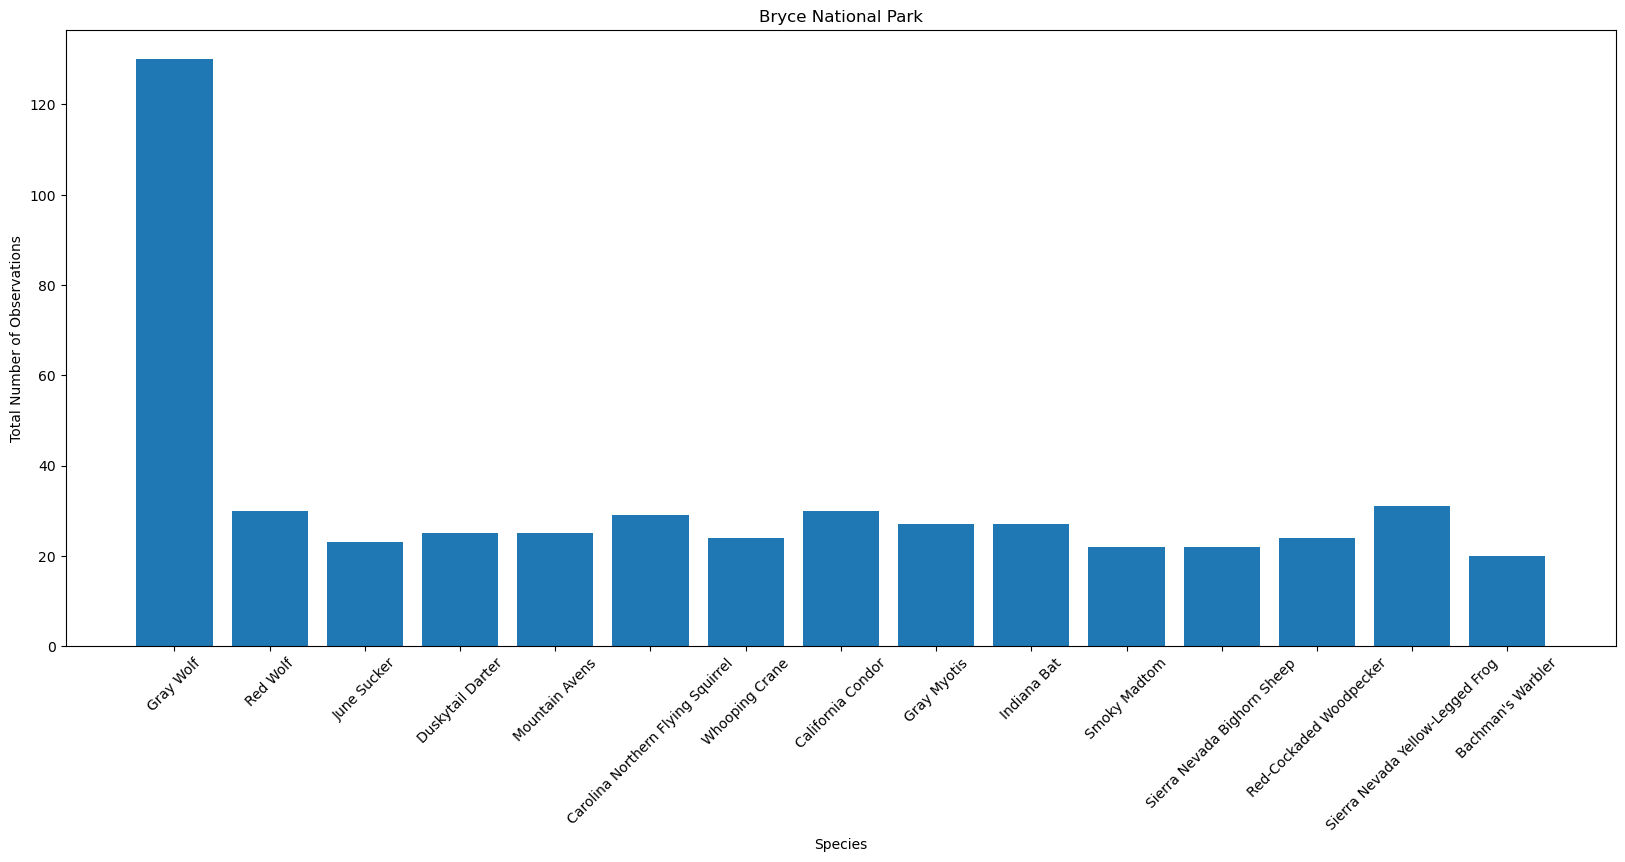

<Figure size 640x480 with 0 Axes>

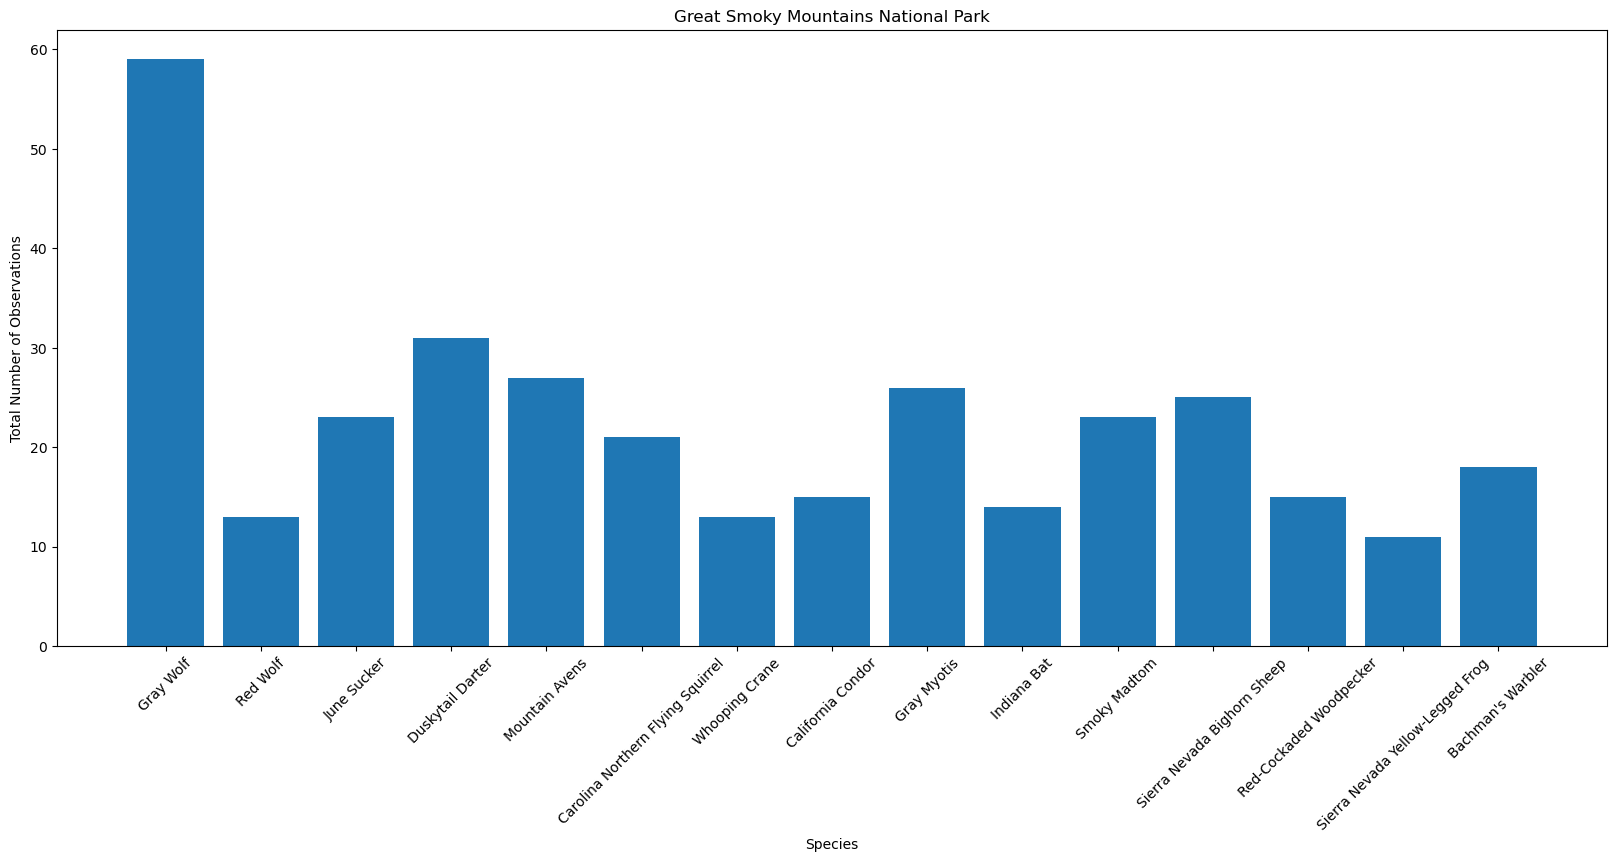

<Figure size 640x480 with 0 Axes>

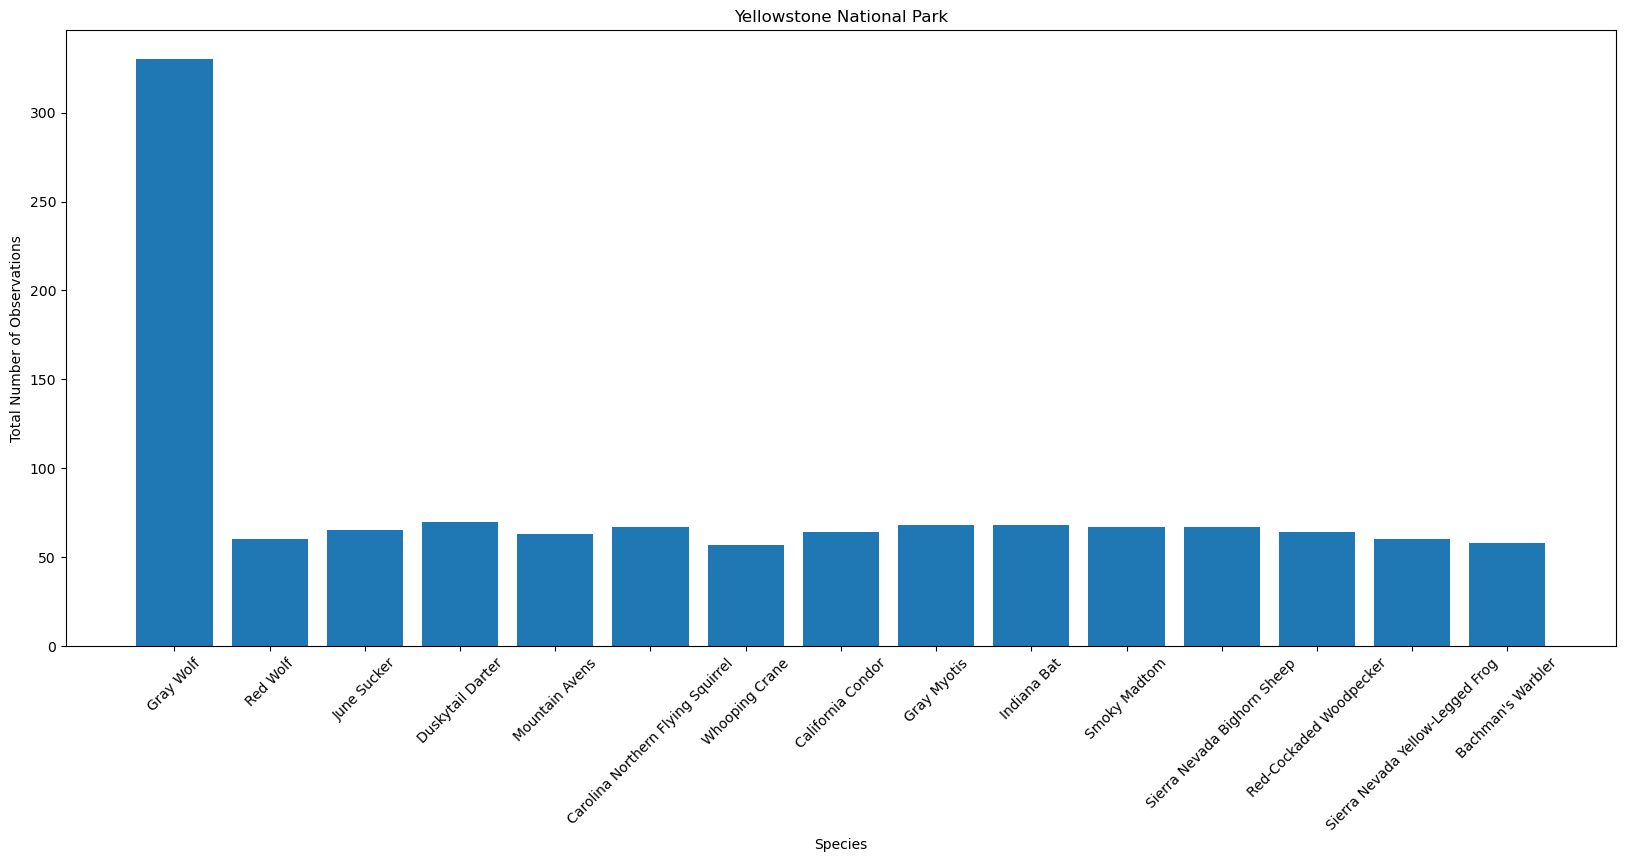

<Figure size 640x480 with 0 Axes>

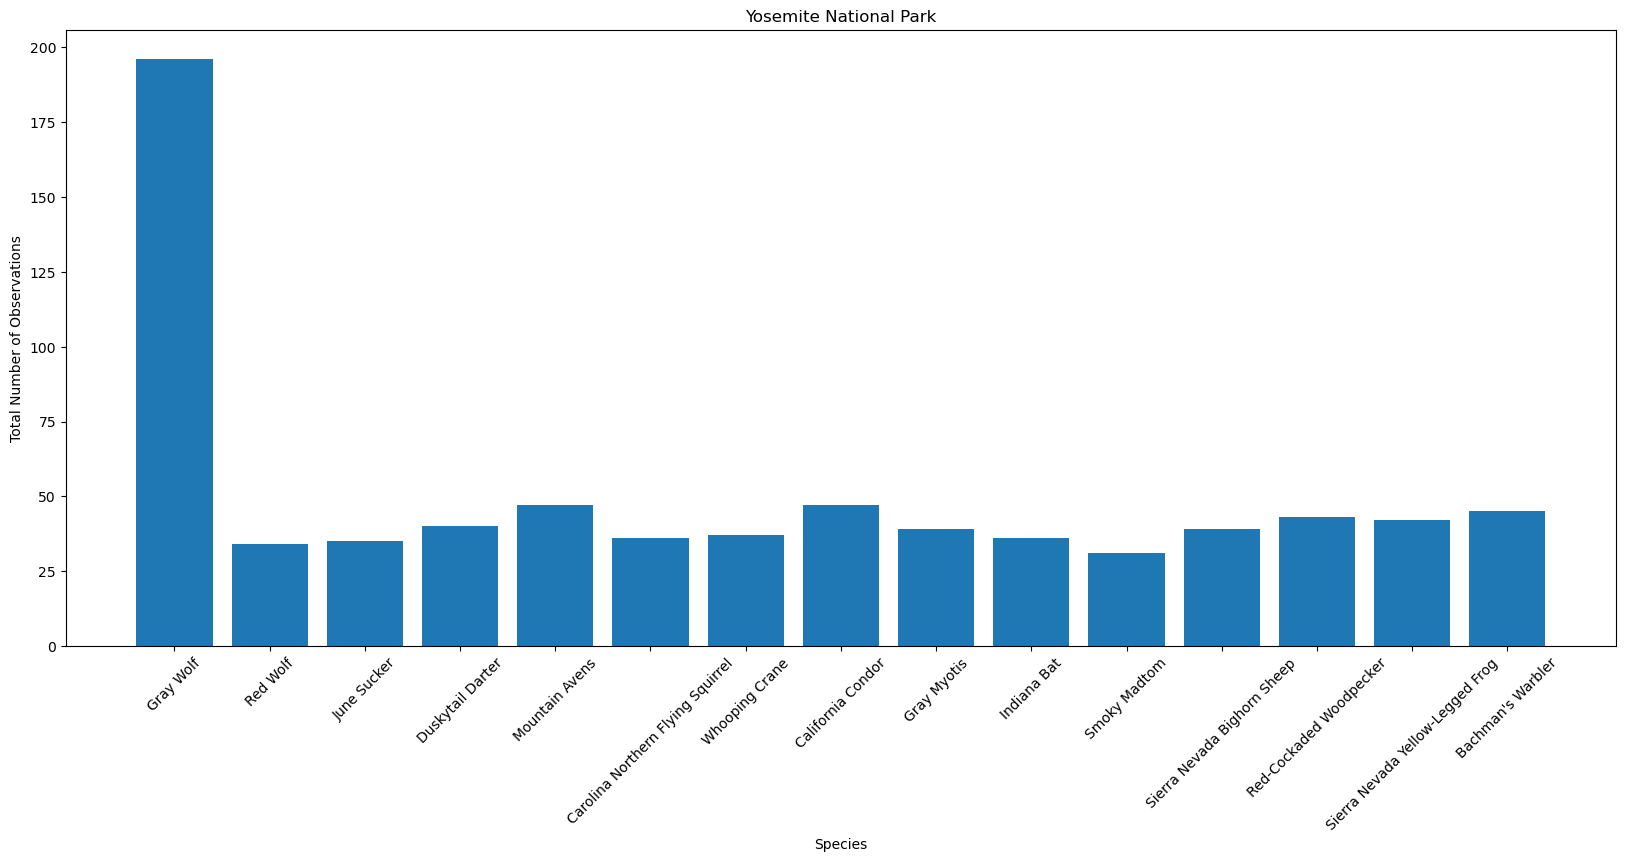

<Figure size 640x480 with 0 Axes>

In [48]:
i=0
for park in [bryce, great_smoky, yellowstone, yosemite]:
    figure = plt.figure(figsize = (20, 8))
    park.common_names = park.common_names.str.split(',').str[0]
    plt.bar(x='common_names', height='observations', data=park[park.conservation_status.isin(['Endangered'])].drop_duplicates(subset='scientific_name'))
    plt.xticks(rotation=45)
    plt.xlabel('Species')
    plt.ylabel('Total Number of Observations')
    plt.title(parks[i])
    i+=1
    plt.show()
    plt.clf()

Surprisingly enough, the endangered species are the same in each park. The only difference is the total number of observations for each one. 

## Conclusions

* Most of the endangered species are birds, mammals, or vascular plants. However, there are many vascular plant species, meaning only a small proportion has a conservation status.
* The overwhelming majority of protected species are in the `Species of Concern` category.
* All endangered species have been observed in all 4 parks, albeit with different frequencies. Knowing which species are endangered and how many hav 